In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as smf

In [2]:
df=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [3]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

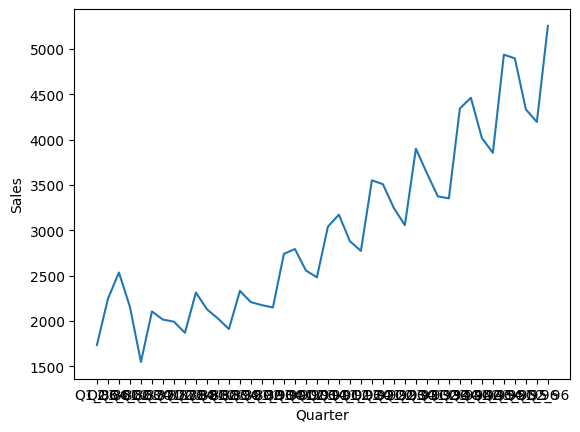

In [6]:
sns.lineplot(x="Quarter",y='Sales',data=df)

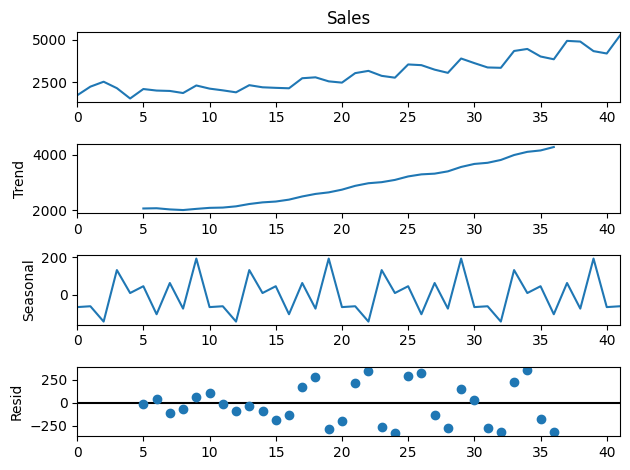

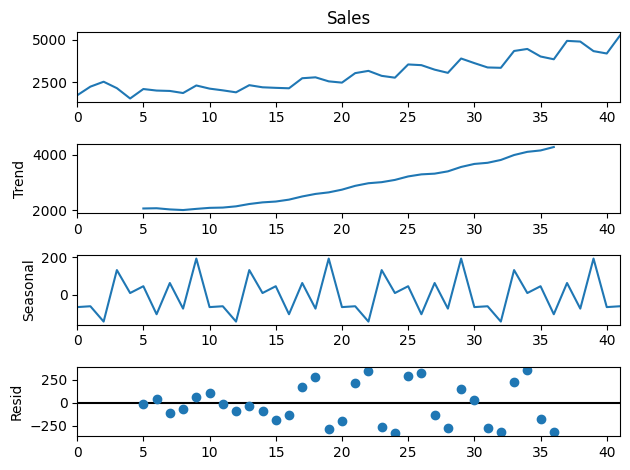

In [7]:
ts_add=smf.tsa.seasonal_decompose(df['Sales'],period=10)
ts_add.plot()

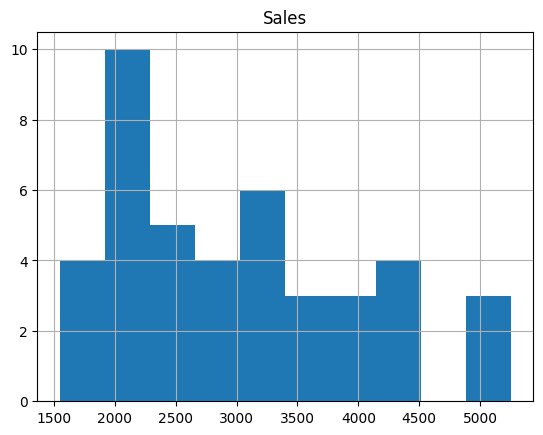

In [8]:
df.hist()
pyplot.show()

<AxesSubplot:>

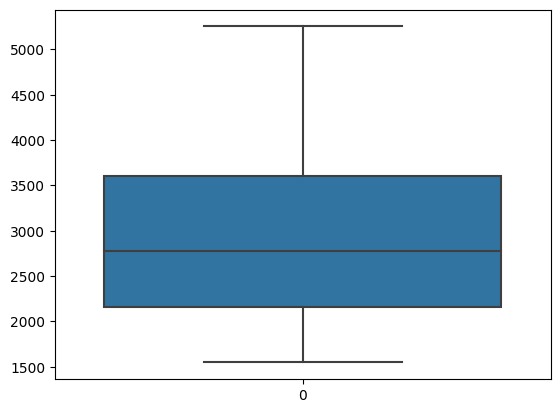

In [9]:
sns.boxplot(data=df['Sales'])

In [12]:
qter=['q1','q2','q3','q4']

In [13]:
p=df['Quarter'][0]
p[0:2]
df['qter']=0
for i in range(42):
    p=df['Quarter'][i]
    df['qter'][i]=p[0:2]
df.head()

C:\Users\91832\AppData\Local\Temp\ipykernel_4240\3251854553.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['qter'][i]=p[0:2]


,Quarter,Sales,qter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


In [14]:
qter_dum=pd.DataFrame(pd.get_dummies(df['qter']))
df1=pd.concat([df,qter_dum],axis=1)
df1.head()

,Quarter,Sales,qter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [16]:
df1["t"] = np.arange(1,43)
df1["t_squared"] = df1["t"]*df1["t"]
df1["log_Sales"] = np.log(df1["Sales"])
df1.head()

,Quarter,Sales,qter,Q1,Q2,Q3,Q4,t,t_squared,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [18]:
train = df1.head(30)
test = df1.tail(10)

In [19]:
import statsmodels.formula.api as smf

In [20]:
# L I N E A R

lin_model = smf.ols('Sales~t',data=train).fit()
pred_lin =  pd.Series(lin_model.predict(pd.DataFrame(test['t'])))
rmse_lin = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_lin))**2))
print("RMSE Linear: ",rmse_lin)

RMSE Linear:  777.6287139221073


In [21]:
# E x p o  n e n t i a l

exp = smf.ols('log_Sales~t',data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
print("RMSE Exponential: ",rmse_exp)

RMSE Exponential:  600.089369373966


In [22]:
# Q u a d  r a t i c

quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_quad = pd.Series(quad.predict(test[["t","t_squared"]]))
rmse_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
print("RMSE Quadratic: ",rmse_quad)

RMSE Quadratic:  680.2527854192869


In [23]:
# Additive seasonality

ada = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_ada = pd.Series(ada.predict(test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_ada = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_ada))**2))
print("RMSE Additive seasonality: ",rmse_ada)

RMSE Additive seasonality:  1898.3504804157517


In [24]:
#Additive Seasonality Quadratic

asq = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=train).fit()
pred_asq = pd.Series(asq.predict(test[['Q1', 'Q2', 'Q3', 'Q4','t','t_squared']]))
rmse_asq = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_asq))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_asq)

RMSE Additive Seasonality Quadratic: 607.852072018353


In [25]:
# Multiplicative Seasonality

mea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_mea = pd.Series(mea.predict(test))
rmse_mea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_mea)

RMSE Multiplicative Seasonality: 1951.0349399697664


In [26]:
# Multiplicative Additive Seasonality

mas = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_mas = pd.Series(mas.predict(test))
rmse_mas = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mas)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_mas)

RMSE Multiplicative Additive Seasonality: 449.4035489163238


In [27]:
# Testing 

data1 = {"MODEL":pd.Series(["rmse_lin","rmse_exp","rmse_quad","rmse_ada","rmse_asq","rmse_mea","rmse_mas"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_exp,rmse_quad,rmse_ada,rmse_asq,rmse_mea,rmse_mas])}
table_rmse=pd.DataFrame(data1)
table_rmse

,MODEL,RMSE_Values
0,rmse_lin,777.628714
1,rmse_exp,600.089369
2,rmse_quad,680.252785
3,rmse_ada,1898.350480
4,rmse_asq,607.852072
5,rmse_mea,1951.034940
6,rmse_mas,449.403549


In [28]:
data = [['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'],['Q2_97', 'Q2']]
print(data)
forecast = pd.DataFrame(data, columns = ['Quarter', 'qter'])
forecast

[['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'], ['Q2_97', 'Q2']]


,Quarter,qter
0,Q3_96,Q3
1,Q4_96,Q4
2,Q1_97,Q1
3,Q2_97,Q2


In [29]:
# Create dummies and T and T-Squared columns

dumi = pd.DataFrame(pd.get_dummies(forecast['qter']))
forecast1 = pd.concat([forecast,dumi],axis = 1)
forecast1["t"] = np.arange(1,5)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

   Quarter qter  Q1  Q2  Q3  Q4  t  t_squared
0   Q3_96   Q3   0   0   1   0  1          1
1   Q4_96   Q4   0   0   0   1  2          4
2   Q1_97   Q1   1   0   0   0  3          9
3   Q2_97   Q2   0   1   0   0  4         16


In [30]:
# Forecasting using Additive Seasonality Quadratic Model

model_full = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=df1).fit()
pred_n = pd.Series(model_full.predict(forecast1))
pred_n
forecast1["forecasted_sales"] = pd.Series(pred_n)

In [31]:
# Final Prediction for next 4 Quarters

Final_pred = forecast1.loc[:, ['Quarter', 'forecasted_sales']] 
Final_pred

,Quarter,forecasted_sales
0,Q3_96,2180.858824
1,Q4_96,1851.383709
2,Q1_97,1635.419724
3,Q2_97,2284.261547
